In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [11]:
data.head(20)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [12]:
data.describe(include='all')

,Review,Liked
count,1000,1000.00000
unique,996,NaN
top,I would not recommend this place.,NaN
freq,2,NaN
mean,NaN,0.50000
std,NaN,0.50025
min,NaN,0.00000
25%,NaN,0.00000
50%,NaN,0.50000
75%,NaN,1.00000


In [13]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

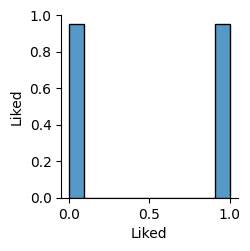

In [42]:
sns.pairplot(data)

<Axes: xlabel='Review', ylabel='count'>

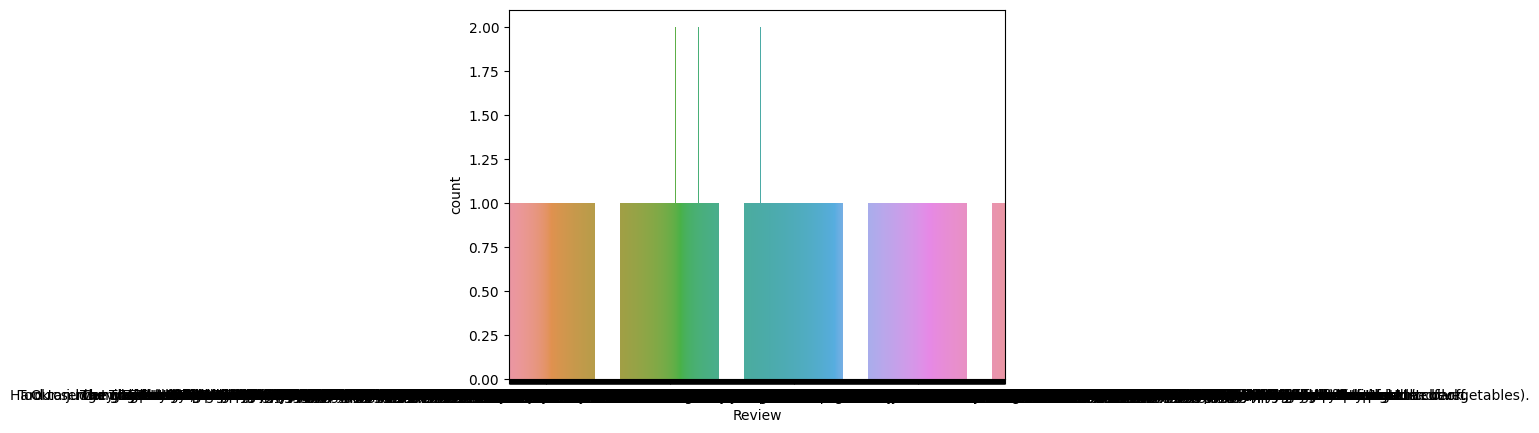

In [45]:
sns.countplot(x='Review', data=data)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Review'])
y = data['Liked']

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
clf = MultinomialNB()

In [24]:
clf.fit(X_train, y_train)

MultinomialNB()

In [25]:
y_pred = clf.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [38]:
accuracy_score(y_test, y_pred)

0.795

In [39]:
confusion_matrix(y_test, y_pred)

array([[81, 15],
       [26, 78]])

In [41]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        96
           1       0.84      0.75      0.79       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200

